In [ ]:
!pip uninstall -y torch torchvision torchaudio

In [ ]:
!pip install torch==2.1.0+cu118 torchvision==0.16.0+cu118 torchaudio==2.1.0 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.1.0%2Bcu118-cp311-cp311-linux_x86_64.whl (2325.9 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.16.0%2Bcu118-cp311-cp311-linux_x86_64.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.1.0%2Bcu118-cp311-cp311-linux_x86_64.whl (3.2 MB)
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu124
    Uninstalling torchvision-0.20.1+cu124:
      Successfully uninstalled torchvision-0.20.1+cu124
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.5.1+cu124
    Uninstalling torchaudio-2.5.1+cu124:
      Successfully uninstalled torchaudio-2.5.1+cu124


In [ ]:
import torch
import torchvision

print("PyTorch CUDA Version:", torch.version.cuda)
print("torchvision Version:", torchvision.__version__)

PyTorch CUDA Version: 11.8
torchvision Version: 0.16.0+cu118


In [ ]:
!pip install diffusers transformers gradio

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

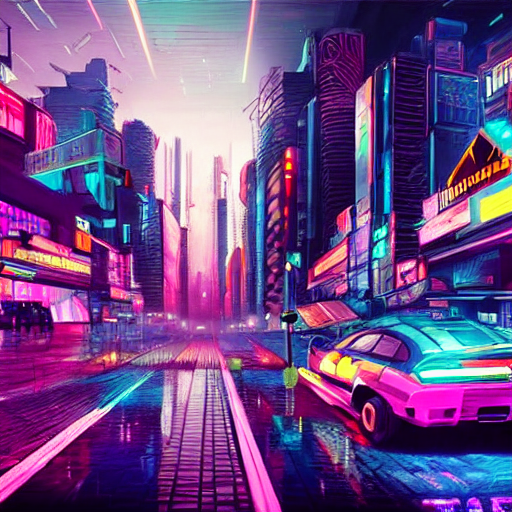

In [ ]:
prompt = "A cyberpunk cityscape with neon lights and flying cars, trending on ArtStation"
guidance_scale = 7.5
num_inference_steps = 50
with torch.autocast(device):
    image = pipe(
        prompt,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps
    ).images[0]

display(image)
image.save("generated_image.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p "/content/drive/MyDrive/Colab_Projects/stable_diffusion"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

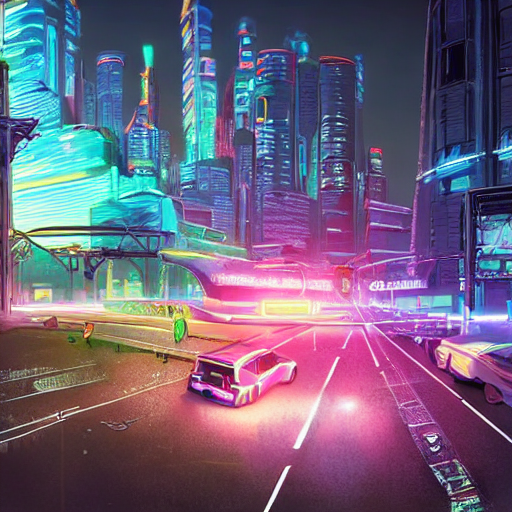

 Success: online_0.png saved to /content/drive/MyDrive/Colab_Projects/stable_diffusion


  0%|          | 0/50 [00:00<?, ?it/s]

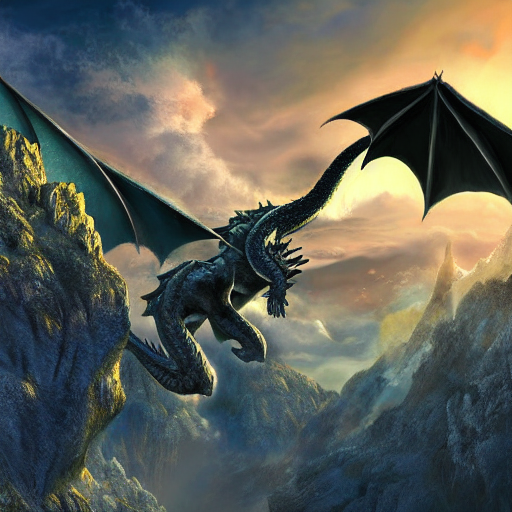

 Success: online_1.png saved to /content/drive/MyDrive/Colab_Projects/stable_diffusion


  0%|          | 0/37 [00:00<?, ?it/s]

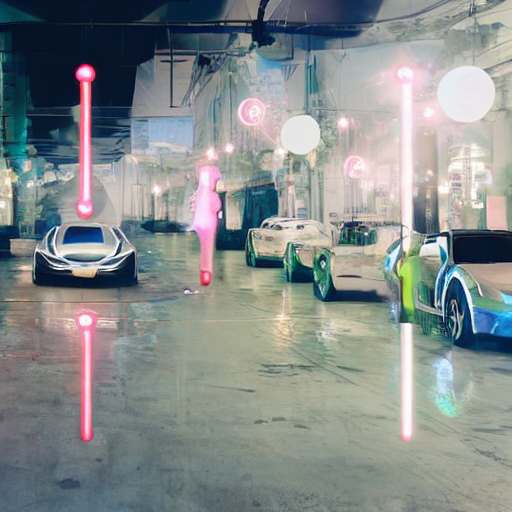

 Success: offline_0.png saved to /content/drive/MyDrive/Colab_Projects/stable_diffusion


  0%|          | 0/37 [00:00<?, ?it/s]

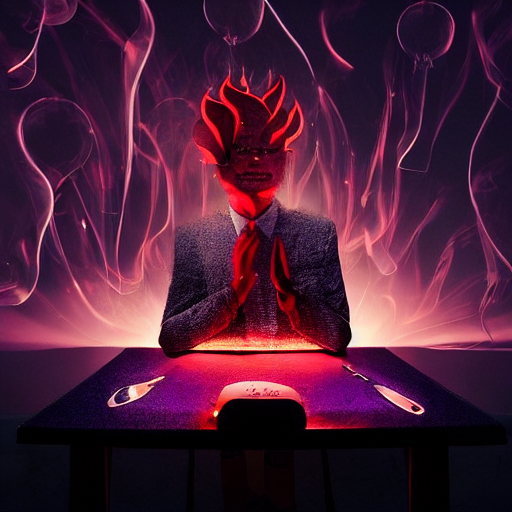

 Success: offline_1.png saved to /content/drive/MyDrive/Colab_Projects/stable_diffusion


In [1]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
import torch
from IPython.display import display
from PIL import Image
import os
from google.colab import drive


drive.mount('/content/drive')
save_path = "/content/drive/MyDrive/Colab_Projects/stable_diffusion"
os.makedirs(save_path, exist_ok=True)

for img_path in ["/content/drive/MyDrive/Colab_Projects/stable_diffusion/im1.jpg",
                "/content/drive/MyDrive/Colab_Projects/stable_diffusion/imges1.jpg"]:
    if not os.path.exists(img_path):
        raise FileNotFoundError(f"Image not found at {img_path}. Check for typos or upload the file.")

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)

img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)

online_prompts = [
    "A cyberpunk cityscape with neon lights and flying cars, trending on ArtStation",
    "A majestic dragon soaring through a fantasy landscape",
]


offline_prompts = [
    (
        "/content/drive/MyDrive/Colab_Projects/stable_diffusion/im1.jpg",
        "A futuristic version of the input image with neon lighting"
    ),
    (
        "/content/drive/MyDrive/Colab_Projects/stable_diffusion/imges1.jpg",
        "A surreal reinterpretation of the input image with glowing elements"
    )
]

def generate_and_save_image(
    text_prompt=None,
    image_path=None,
    filename="output.png",
    strength=0.75,
    guidance_scale=7.5
):
    try:

        if image_path:
            if not os.path.exists(image_path):
                raise FileNotFoundError(f"Image not found at {image_path}. Verify path and upload status.")
            if not text_prompt:
                raise ValueError("Text prompt is required for image-to-image generation")

        with torch.autocast(device):
            if image_path:
                init_image = Image.open(image_path).convert("RGB")
                init_image = init_image.resize((512, 512))
                image = img2img_pipe(
                    prompt=text_prompt,
                    image=init_image,
                    strength=strength,
                    guidance_scale=guidance_scale
                ).images[0]
            else:
                image = pipe(
                    text_prompt,
                    guidance_scale=guidance_scale
                ).images[0]

            display(image)
            image.save(os.path.join(save_path, filename))
            print(f" Success: {filename} saved to {save_path}")

    except FileNotFoundError as e:
        print(f" Error: {e}")
    except Exception as e:
        print(f" Unexpected error: {str(e)}")


for idx, prompt in enumerate(online_prompts):
    generate_and_save_image(
        text_prompt=prompt,
        filename=f"online_{idx}.png",
        guidance_scale=5.0
    )


for idx, (img_path, txt_prompt) in enumerate(offline_prompts):
    generate_and_save_image(
        text_prompt=txt_prompt,
        image_path=img_path,
        filename=f"offline_{idx}.png",
        strength=0.75,
        guidance_scale=5.0
    )

In [ ]:
image.save("/content/drive/MyDrive/Colab_Projects/stable_diffusion/generated_image.png")

In [ ]:
from google.colab import files
notebook_path = '/content/drive/MyDrive/Colab Notebooks/Colab_Projects.ipynb'

if os.path.exists(notebook_path):
    files.download(notebook_path)
else:
    print(f"Error: File not found at {notebook_path}. Please check the file path and ensure it's saved.")

Error: File not found at /content/drive/MyDrive/Colab Notebooks/Colab_Projects.ipynb. Please check the file path and ensure it's saved.


In [1]:
!pip install diffusers transformers gradio torch

In [3]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline
import torch
import gradio as gr
from PIL import Image
import os
from google.colab import drive

try:
    drive.mount('/content/drive', force_remount=True)
except Exception as e:
    raise RuntimeError("Failed to mount Google Drive. Check authorization.") from e

save_path = "/content/drive/MyDrive/Colab_Projects/stable_diffusion"
os.makedirs(save_path, exist_ok=True)

image_paths = [
    "/content/drive/MyDrive/Colab_Projects/stable_diffusion/im1.jpg",
    "/content/drive/MyDrive/Colab_Projects/stable_diffusion/imges1.jpg"
]
for img_path in image_paths:
    if not os.path.exists(img_path):
        print(f" File not found: {img_path}")
        print("Files in directory:")
        !ls "/content/drive/MyDrive/Colab_Projects/stable_diffusion"
        raise FileNotFoundError(f"Upload missing file to: {img_path}")

device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = None
img2img_pipe = None

def load_models():
    global pipe, img2img_pipe
    if not pipe:
        pipe = StableDiffusionPipeline.from_pretrained(
            "runwayml/stable-diffusion-v1-5",
            torch_dtype=torch.float16
        ).to(device)
    if not img2img_pipe:
        img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
            "runwayml/stable-diffusion-v1-5",
            torch_dtype=torch.float16
        ).to(device)

def generate_text_to_image(prompt, guidance_scale, steps):
    try:
        load_models()
        with torch.autocast(device):
            image = pipe(
                prompt,
                guidance_scale=guidance_scale,
                num_inference_steps=steps
            ).images[0]
        filename = f"text2img_{prompt[:10]}_{steps}steps.png"
        image.save(os.path.join(save_path, filename))
        return image
    except Exception as e:
        return f" Error: {str(e)}"

def generate_image_to_image(input_image, prompt, strength, guidance_scale, steps):
    try:
        load_models()
        input_image = input_image.resize((512, 512)).convert("RGB")
        with torch.autocast(device):
            image = img2img_pipe(
                prompt=prompt,
                image=input_image,
                strength=strength,
                guidance_scale=guidance_scale,
                num_inference_steps=steps
            ).images[0]
        filename = f"img2img_{prompt[:10]}_{steps}steps.png"
        image.save(os.path.join(save_path, filename))
        return image
    except Exception as e:
        return f" Error: {str(e)}"

with gr.Blocks() as demo:
    gr.Markdown("# Stable Diffusion Playground")

    with gr.Tab("✨ Text-to-Image"):
        with gr.Row():
            text_prompt = gr.Textbox(label="Describe your vision", placeholder="e.g., 'A cyberpunk city with neon lights'")
            text_output = gr.Image(label="Generated Artwork")
        with gr.Row():
            guidance_slider = gr.Slider(5.0, 15.0, 7.5, label="Guidance Scale (Creativity vs. Accuracy)")
            steps_slider = gr.Slider(25, 100, 50, label="Quality Steps (Higher = Slower)")
        text_generate_btn = gr.Button("Generate Masterpiece")

    with gr.Tab(" Image-to-Image"):
        with gr.Row():
            input_image = gr.Image(label="Upload Base Image", type="pil")
            img_output = gr.Image(label="Modified Artwork")
        with gr.Row():
            img_prompt = gr.Textbox(label="Describe modifications", placeholder="e.g., 'Add glowing elements'")
            strength_slider = gr.Slider(0.0, 1.0, 0.75, label="Transformation Strength")
        with gr.Row():
            img_guidance_slider = gr.Slider(5.0, 15.0, 7.5, label="Guidance Scale")
            img_steps_slider = gr.Slider(25, 100, 50, label="Quality Steps")
        img_generate_btn = gr.Button("Transform Image")

    text_generate_btn.click(
        generate_text_to_image,
        inputs=[text_prompt, guidance_slider, steps_slider],
        outputs=text_output
    )
    img_generate_btn.click(
        generate_image_to_image,
        inputs=[input_image, img_prompt, strength_slider, img_guidance_slider, img_steps_slider],
        outputs=img_output
    )

if __name__ == "__main__":
    demo.queue().launch(debug=True, share=True)

Mounted at /content/drive
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c9cca2e27abd70d1a5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c9cca2e27abd70d1a5.gradio.live
